This is the first installment of a series in individual linear regressions between several dozen questions from the WVS Database dataset from 2017-2022 on world values and the measures of democracy via an index provided by the Global State of Democracy indexes.

In [1]:
import os  # Library for interacting with the operating system, providing functions for file and directory manipulation.
import pandas as pd  # Pandas is a popular data manipulation and analysis library in Python.
import statsmodels.formula.api as smf  # Library for statistical modeling and analysis using formulas,
                                      # providing a high-level interface for specifying and fitting statistical models.
import statsmodels.api as sm  # Library for statistical modeling and analysis, providing a low-level interface for specifying
                               # and fitting statistical models.
from statsmodels.stats.outliers_influence import reset_ramsey  # to perform the RESET test
import scipy.stats as stats  # Library for statistical functions and distributions, providing a wide range of statistical tools
                              # and probability distributions.
from scipy.stats import zscore
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations in Python, providing a
                                  # MATLAB-like plotting interface.
import seaborn as sns  # Library for statistical data visualization, providing high-level functions for creating informative
                        # and attractive statistical graphics.
import numpy as np  # Library for numerical computing, providing efficient array operations and mathematical functions for
                     # working with numerical data.

print(os.getcwd())  # Print the current working directory

/home/jovyan/World Democracy Project


In [2]:
file_path = os.path.join(os.getcwd(), 'Important_in_life_Family.xls')
print(os.path.exists(file_path))

True


In [3]:
# Load democracy data set
rep_gov_IDEA = pd.read_excel('Representative_Government_IDEA.xlsx')

# Display the first few rows of the DataFrame
print(rep_gov_IDEA.head())

   Year Country name  Representative Government Score   
0  2021  Afghanistan                             0.00  \
1  2021      Albania                             0.64   
2  2021      Algeria                             0.37   
3  2021       Angola                             0.42   
4  2021    Argentina                             0.87   

   Fundamental Rights Score  Checks on Government Score   
0                      0.31                        0.24  \
1                      0.69                        0.58   
2                      0.51                        0.44   
3                      0.49                        0.44   
4                      0.62                        0.65   

   Impartial Adminstration Score  Total Democracy Index  
0                           0.49                 0.2600  
1                           0.36                 0.5675  
2                           0.39                 0.4275  
3                           0.44                 0.4475  
4           

In [4]:
# Load family data set
Q1_Family = pd.read_excel('Important_in_life_Family.xls', skiprows = 6)

# Display the first few rows of the DataFrame
print(Q1_Family)

                                     Unnamed: 0       Unnamed: 1      Albania   
0                                Very important  88.9% (136,829)    97.400000  \
1                              Rather important    9.6% (14,709)     1.900000   
2                            Not very important     1.1% (1,650)     0.300000   
3                          Not at all important       0.3% (400)     0.000000   
4                                    Don't know       0.1% (116)     0.100000   
5                                     No answer       0.1% (181)     0.200000   
6   Other missing; Multiple answers Mail (EVS)         0.0% (65)     0.000000   
7                              Weighted average              NaN    98.766667   
8                                           (N)           153950  1454.000000   
9                                           NaN              NaN          NaN   
10                        Very important weight                3          NaN   
11                      Rath

In [5]:
#Scaling proportions from 0 to 100 to 0 to 1 to allow for direct comparison

# Get all columns except the first two
cols_to_scale = Q1_Family.columns[2:]

# Scale columns 3 to 92 and rows 0 to 7
Q1_Family.loc[:7, cols_to_scale] = Q1_Family.loc[:7, cols_to_scale] / 100

# Display the first few rows of the DataFrame
print(Q1_Family)

                                     Unnamed: 0       Unnamed: 1      Albania   
0                                Very important  88.9% (136,829)     0.974000  \
1                              Rather important    9.6% (14,709)     0.019000   
2                            Not very important     1.1% (1,650)     0.003000   
3                          Not at all important       0.3% (400)     0.000000   
4                                    Don't know       0.1% (116)     0.001000   
5                                     No answer       0.1% (181)     0.002000   
6   Other missing; Multiple answers Mail (EVS)         0.0% (65)     0.000000   
7                              Weighted average              NaN     0.987667   
8                                           (N)           153950  1454.000000   
9                                           NaN              NaN          NaN   
10                        Very important weight                3          NaN   
11                      Rath

In [6]:
#Checking for missing values in the datasets

# Checking for missing values in Q1_Family
missing_values_Q1_Family = Q1_Family.head(9).isnull().sum()
print("Missing values in Q1_Family:\n", missing_values_Q1_Family)

# Checking for missing values in rep_gov_IDEA
missing_values_rep_gov_IDEA = rep_gov_IDEA.isnull().sum()
print("\nMissing values in rep_gov_IDEA:\n", missing_values_rep_gov_IDEA)

Missing values in Q1_Family:
 Unnamed: 0          0
Unnamed: 1          1
Albania             0
Andorra             0
Azerbaijan          0
                   ..
Great Britain       0
United States       0
Uruguay             0
Venezuela           0
Northern Ireland    0
Length: 92, dtype: int64

Missing values in rep_gov_IDEA:
 Year                               0
Country name                       0
Representative Government Score    0
Fundamental Rights Score           0
Checks on Government Score         0
Impartial Adminstration Score      0
Total Democracy Index              0
dtype: int64


In [7]:
# Selecting the 8th row and all but the first two columns
Q1_FamilyCut = Q1_Family.iloc[7, 2:]

# Creating a new DataFrame with the selected row and columns
Q1_FamilyCut = pd.DataFrame(Q1_FamilyCut).T

# Resetting the column index
Q1_FamilyCut.reset_index(drop=True, inplace=True)

# Printing the new DataFrame
print(Q1_FamilyCut)

    Albania   Andorra Azerbaijan Argentina Australia   Austria Bangladesh   
0  0.987667  0.961333   0.965333     0.972  0.956333  0.926333      0.995  \

    Armenia   Bolivia Bosnia Herzegovina  ...   Tunisia    Turkey Ukraine   
0  0.968667  0.931667           0.972667  ...  0.989333  0.969333   0.941  \

  North Macedonia  Egypt Great Britain United States Uruguay Venezuela   
0           0.972  0.999      0.966333      0.962667   0.967  0.941333  \

  Northern Ireland  
0            0.981  

[1 rows x 90 columns]


In [8]:
#Transposing the Q1_Family dataframe to prepare it for a merge with rep_gov_idea

# Transposing the DataFrame
Q1_FamilyCut_T = Q1_FamilyCut.T

# Resetting the index and renaming the columns
Q1_FamilyCut_T.reset_index(inplace=True)
Q1_FamilyCut_T.columns = ["Country name", "Family Index"]

# Printing the transposed DataFrame
print(Q1_FamilyCut_T)

        Country name Family Index
0            Albania     0.987667
1            Andorra     0.961333
2         Azerbaijan     0.965333
3          Argentina        0.972
4          Australia     0.956333
..               ...          ...
85     Great Britain     0.966333
86     United States     0.962667
87           Uruguay        0.967
88         Venezuela     0.941333
89  Northern Ireland        0.981

[90 rows x 2 columns]


In [9]:
#Merging the two data frames together
merged_df = pd.merge(Q1_FamilyCut_T, rep_gov_IDEA,  how='inner', left_on=['Country name'], 
                     right_on = ['Country name'])
merged_df['Family Index'] = pd.to_numeric(merged_df['Family Index'], errors='coerce')

# Print the merged DataFrame
print(merged_df)

       Country name  Family Index  Year  Representative Government Score   
0           Albania      0.987667  2021                             0.64  \
1        Azerbaijan      0.965333  2021                             0.28   
2         Argentina      0.972000  2021                             0.87   
3         Australia      0.956333  2021                             0.83   
4           Austria      0.926333  2021                             0.83   
..              ...           ...   ...                              ...   
73          Ukraine      0.941000  2021                             0.56   
74  North Macedonia      0.972000  2021                             0.68   
75            Egypt      0.999000  2021                             0.27   
76          Uruguay      0.967000  2021                             0.88   
77        Venezuela      0.941333  2021                             0.27   

    Fundamental Rights Score  Checks on Government Score   
0                       0.6

In [10]:
# Now I will merge all the World Values data frames.
# Load data sets
Q2_Friends = pd.read_excel('Important_in_life_Friends.xls', skiprows = 6)
Q3_Leisure = pd.read_excel('Important_in_life_Leisure_time.xls', skiprows = 6)
Q4_Politics = pd.read_excel('Important_in_life_Politics.xls', skiprows = 6)
Q5_Religion = pd.read_excel('Important_in_life_Religion.xls', skiprows = 6)
Q6_Work = pd.read_excel('Important_in_life_Work.xls', skiprows = 6)

# Define the DataFrame titles
title_dict = {
    'Q2_Friends': '**Q2_Friends**',
    'Q3_Leisure': '**Q3_Leisure**',
    'Q4_Politics': '**Q4_Politics**',
    'Q5_Religion': '**Q5_Religion**',
    'Q6_Work': '**Q6_Work**'
}

# Display the first few rows of each DataFrame with the corresponding title
print(title_dict['Q2_Friends'])
print(Q2_Friends.head(2))
print()

print(title_dict['Q3_Leisure'])
print(Q3_Leisure.head(2))
print()

print(title_dict['Q4_Politics'])
print(Q4_Politics.head(2))
print()

print(title_dict['Q5_Religion'])
print(Q5_Religion.head(2))
print()

print(title_dict['Q6_Work'])
print(Q6_Work.head(2))
print()

**Q2_Friends**
         Unnamed: 0      Unnamed: 1  Albania  Andorra  Azerbaijan  Argentina   
0    Very important  45.4% (69,952)     36.0     54.9        26.1       51.9  \
1  Rather important  43.3% (66,614)     55.2     37.5        59.7       37.2   

   Australia  Austria  Bangladesh  Armenia  ...  Tunisia  Turkey  Ukraine   
0       52.4     60.1        25.2     42.9  ...     47.0    61.7     33.5  \
1       40.0     34.9        49.3     43.2  ...     35.8    34.9     53.8   

   North Macedonia  Egypt  Great Britain  United States  Uruguay  Venezuela   
0             50.9   41.7           59.2           50.7     46.8       35.8  \
1             40.0   39.7           35.5           38.4     34.4       41.9   

   Northern Ireland  
0              69.8  
1              26.7  

[2 rows x 92 columns]

**Q3_Leisure**
         Unnamed: 0      Unnamed: 1  Albania  Andorra  Azerbaijan  Argentina   
0    Very important  41.0% (63,169)     18.0     62.9        27.5       33.0  \
1  Rather

In [11]:
#Merging

data_frames = [Q2_Friends, Q3_Leisure, Q4_Politics, Q5_Religion, Q6_Work]

# Iterate over the data frames
for df in data_frames:
    # Get all columns except the first two
    cols_to_scale = df.columns[2:]
    
    # Scale columns 3 to 92 and rows 0 to 7
    df.loc[:7, cols_to_scale] = df.loc[:7, cols_to_scale] / 100
    
    # Display the first few rows of the DataFrame
    print(df.head(3))
    print()

           Unnamed: 0      Unnamed: 1  Albania  Andorra  Azerbaijan   
0      Very important  45.4% (69,952)    0.360    0.549       0.261  \
1    Rather important  43.3% (66,614)    0.552    0.375       0.597   
2  Not very important   9.5% (14,594)    0.075    0.069       0.108   

   Argentina  Australia  Austria  Bangladesh  Armenia  ...  Tunisia  Turkey   
0      0.519      0.524    0.601       0.252    0.429  ...    0.470   0.617  \
1      0.372      0.400    0.349       0.493    0.432  ...    0.358   0.349   
2      0.085      0.051    0.045       0.183    0.118  ...    0.127   0.029   

   Ukraine  North Macedonia  Egypt  Great Britain  United States  Uruguay   
0    0.335            0.509  0.417          0.592          0.507    0.468  \
1    0.538            0.400  0.397          0.355          0.384    0.344   
2    0.100            0.058  0.137          0.047          0.094    0.149   

   Venezuela  Northern Ireland  
0      0.358             0.698  
1      0.419           

In [12]:
data_frames = [Q2_Friends, Q3_Leisure, Q4_Politics, Q5_Religion, Q6_Work]
titles = ['Q2_Friends', 'Q3_Leisure', 'Q4_Politics', 'Q5_Religion', 'Q6_Work']

# Iterate over the data frames
for df, title in zip(data_frames, titles):
    # Checking for missing values in the current data frame
    missing_values = df.head(9).isnull().sum()
    
    # Print the title and missing values
    print("Missing values in", title, ":\n", missing_values)
    print()

Missing values in Q2_Friends :
 Unnamed: 0          0
Unnamed: 1          1
Albania             0
Andorra             0
Azerbaijan          0
                   ..
Great Britain       0
United States       0
Uruguay             0
Venezuela           0
Northern Ireland    0
Length: 92, dtype: int64

Missing values in Q3_Leisure :
 Unnamed: 0          0
Unnamed: 1          1
Albania             0
Andorra             0
Azerbaijan          0
                   ..
Great Britain       0
United States       0
Uruguay             0
Venezuela           0
Northern Ireland    0
Length: 92, dtype: int64

Missing values in Q4_Politics :
 Unnamed: 0          1
Unnamed: 1          1
Albania             0
Andorra             0
Azerbaijan          0
                   ..
Great Britain       0
United States       0
Uruguay             0
Venezuela           0
Northern Ireland    0
Length: 92, dtype: int64

Missing values in Q5_Religion :
 Unnamed: 0          1
Unnamed: 1          1
Albania             0


In [13]:
# Iterate over the data frames
for df, title in zip(data_frames, titles):
    # Selecting the 8th row and all but the first two columns
    df_cut = df.iloc[7, 2:]
    
    # Creating a new DataFrame with the selected row and columns
    df_cut = pd.DataFrame(df_cut).T
    
    # Resetting the column index
    df_cut.reset_index(drop=True, inplace=True)
    
    # Print the title
    print(title)
    
    # Print the first three rows of the new DataFrame
    print(df_cut.head(3))
    
    # Print a blank line
    print()
    
    # Transposing the DataFrame
    df_cut_t = df_cut.T
    
    # Resetting the index and renaming the columns
    df_cut_t.reset_index(inplace=True)
    df_cut_t.columns = ["Country name", title + "Cut"]
    
    # Print the title
    print(title)
    
    # Print the transposed DataFrame
    print(df_cut_t.head(3))
    
    # Print a blank line
    print()
    
    # Assign the transposed DataFrame to the respective variable name
    globals()[title + "Cut_T"] = df_cut_t

Q2_Friends
  Albania Andorra Azerbaijan Argentina Australia   Austria Bangladesh   
0   0.753   0.822      0.695  0.795333  0.807667  0.848667   0.641667  \

    Armenia   Bolivia Bosnia Herzegovina  ... Tunisia    Turkey Ukraine   
0  0.756333  0.542333              0.808  ...   0.751  0.859333   0.727  \

  North Macedonia     Egypt Great Britain United States Uruguay Venezuela   
0           0.795  0.727333      0.844333      0.794333   0.747     0.709  \

  Northern Ireland  
0            0.885  

[1 rows x 90 columns]

Q2_Friends
  Country name Q2_FriendsCut
0      Albania         0.753
1      Andorra         0.822
2   Azerbaijan         0.695

Q3_Leisure
    Albania   Andorra Azerbaijan Argentina Australia Austria Bangladesh   
0  0.656667  0.859333      0.671     0.705  0.769333   0.792      0.597  \

    Armenia   Bolivia Bosnia Herzegovina  ...   Tunisia    Turkey   Ukraine   
0  0.679667  0.733667              0.762  ...  0.736333  0.820333  0.709333  \

  North Macedonia    

In [14]:
#Rename the data frame columns
Q2_FriendsCut_T.rename(columns={'Q2_FriendsCut': 'Friends Index'}, inplace=True)
print(Q2_FriendsCut_T.head(4))
print()

Q3_LeisureCut_T.rename(columns={'Q3_LeisureCut': 'Leisure Index'}, inplace=True)
print(Q3_LeisureCut_T.head(4))
print()

Q4_PoliticsCut_T.rename(columns={'Q4_PoliticsCut': 'Politics Index'}, inplace=True)
print(Q4_PoliticsCut_T.head(4))
print()

Q5_ReligionCut_T.rename(columns={'Q5_ReligionCut': 'Religion Index'}, inplace=True)
print(Q5_ReligionCut_T.head(4))
print()

Q6_WorkCut_T.rename(columns={'Q6_WorkCut': 'Work Index'}, inplace=True)
print(Q6_WorkCut_T.head(4))

  Country name Friends Index
0      Albania         0.753
1      Andorra         0.822
2   Azerbaijan         0.695
3    Argentina      0.795333

  Country name Leisure Index
0      Albania      0.656667
1      Andorra      0.859333
2   Azerbaijan         0.671
3    Argentina         0.705

  Country name Politics Index
0      Albania       0.234333
1      Andorra          0.353
2   Azerbaijan          0.365
3    Argentina       0.355667

  Country name Religion Index
0      Albania          0.621
1      Andorra       0.344667
2   Azerbaijan       0.521333
3    Argentina       0.569333

  Country name Work Index
0      Albania   0.924667
1      Andorra   0.823667
2   Azerbaijan   0.800333
3    Argentina   0.831667


In [15]:
#Merge the data frames Q2 through Q6 with merged_df, which includes Q1 and the Democracy Index.

# Merging Q2_FriendsCut_T with merged_df
merged_df = pd.merge(merged_df, Q2_FriendsCut_T, how='inner', on='Country name')
# Convert 'Friends Index' column to numeric
merged_df['Friends Index'] = pd.to_numeric(merged_df['Friends Index'], errors='coerce')

# Merging Q3_LeisureCut_T with merged_df
merged_df = pd.merge(merged_df, Q3_LeisureCut_T, how='inner', on='Country name')
# Convert 'Leisure Index' column to numeric
merged_df['Leisure Index'] = pd.to_numeric(merged_df['Leisure Index'], errors='coerce')

# Merging Q4_PoliticsCut_T with merged_df
merged_df = pd.merge(merged_df, Q4_PoliticsCut_T, how='inner', on='Country name')
# Convert 'Politics Index' column to numeric
merged_df['Politics Index'] = pd.to_numeric(merged_df['Politics Index'], errors='coerce')

# Merging Q5_ReligionCut_T with merged_df
merged_df = pd.merge(merged_df, Q5_ReligionCut_T, how='inner', on='Country name')
# Convert 'Religion Index' column to numeric
merged_df['Religion Index'] = pd.to_numeric(merged_df['Religion Index'], errors='coerce')

# Merging Q6_WorkCut_T with merged_df
merged_df = pd.merge(merged_df, Q6_WorkCut_T, how='inner', on='Country name')
# Convert 'Work Index' column to numeric
merged_df['Work Index'] = pd.to_numeric(merged_df['Work Index'], errors='coerce')

# Print the merged DataFrame
print(merged_df)

       Country name  Family Index  Year  Representative Government Score   
0           Albania      0.987667  2021                             0.64  \
1        Azerbaijan      0.965333  2021                             0.28   
2         Argentina      0.972000  2021                             0.87   
3         Australia      0.956333  2021                             0.83   
4           Austria      0.926333  2021                             0.83   
..              ...           ...   ...                              ...   
73          Ukraine      0.941000  2021                             0.56   
74  North Macedonia      0.972000  2021                             0.68   
75            Egypt      0.999000  2021                             0.27   
76          Uruguay      0.967000  2021                             0.88   
77        Venezuela      0.941333  2021                             0.27   

    Fundamental Rights Score  Checks on Government Score   
0                       0.6

In [16]:
#Remove the "Year" column and reorder the remaining columns in merged_df.

merged_df = merged_df.drop('Year', axis=1)

# Reorder the columns
column_order = [
    'Country name',
    'Family Index',
    'Friends Index',
    'Leisure Index',
    'Politics Index',
    'Religion Index',
    'Work Index',
    'Representative Government Score',
    'Fundamental Rights Score',
    'Checks on Government Score',
    'Impartial Adminstration Score',
    'Total Democracy Index'
]
merged_df = merged_df[column_order]

# Print the resulting DataFrame
print(merged_df)

       Country name  Family Index  Friends Index  Leisure Index   
0           Albania      0.987667       0.753000       0.656667  \
1        Azerbaijan      0.965333       0.695000       0.671000   
2         Argentina      0.972000       0.795333       0.705000   
3         Australia      0.956333       0.807667       0.769333   
4           Austria      0.926333       0.848667       0.792000   
..              ...           ...            ...            ...   
73          Ukraine      0.941000       0.727000       0.709333   
74  North Macedonia      0.972000       0.795000       0.787667   
75            Egypt      0.999000       0.727333       0.529667   
76          Uruguay      0.967000       0.747000       0.804333   
77        Venezuela      0.941333       0.709000       0.765333   

    Politics Index  Religion Index  Work Index   
0         0.234333        0.621000    0.924667  \
1         0.365000        0.521333    0.800333   
2         0.355667        0.569333    0.83166

In [17]:
#Now I am going to color label countries by their geographic and cultural association location. There will be six 
#distinctive groups: Anglo, in blue etc; Western Europe, in dark blue; Eastern Europe, in orange; Asia, in green; 
#Africa, in pink; and the Middle East, in purple. This is for future analysis.

#Creating a dictionary to assign a geographical location to each country
region_dict = {
    'United States': 'Anglo',
    'Great Britain': 'Anglo',
    'France': 'Western Europe',
    'Germany': 'Western Europe',
    'Albania': 'Eastern Europe',
    'Azerbaijan': 'Asia',
    'Argentina': 'South America',
    'Australia': 'Anglo',
    'Austria': 'Western Europe',
    'Bangladesh': 'Asia',
    'Armenia': 'Asia',
    'Bolivia': 'South America',
    'Brazil': 'South America',
    'Bulgaria': 'Eastern Europe',
    'Myanmar': 'Asia',
    'Belarus': 'Eastern Europe',
    'Canada': 'Anglo',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Croatia': 'Eastern Europe',
    'Cyprus': 'Western Europe',
    'Czechia': 'Eastern Europe',
    'Denmark': 'Western Europe',
    'Ecuador': 'South America',
    'Ethiopia': 'Africa',
    'Estonia': 'Eastern Europe',
    'Finland': 'Western Europe',
    'France': 'Western Europe',
    'Georgia': 'Asia',
    'Germany': 'Western Europe',
    'Greece': 'Western Europe',
    'Guatemala': 'North America',
    'Hungary': 'Eastern Europe',
    'Iceland': 'Western Europe',
    'Indonesia': 'Asia',
    'Iran': 'The Middle East',
    'Iraq': 'The Middle East',
    'Italy': 'Western Europe',
    'Japan': 'Asia',
    'Kazakhstan': 'Asia',
    'Jordan': 'The Middle East',
    'Kenya': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Lebanon': 'The Middle East',
    'Latvia': 'Eastern Europe',
    'Libya': 'Africa',
    'Lithuania': 'Eastern Europe',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mexico': 'North America',
    'Mongolia': 'Asia',
    'Montenegro': 'Eastern Europe',
    'Morocco': 'Africa',
    'Netherlands': 'Western Europe',
    'New Zealand': 'Anglo',
    'Nicaragua': 'North America',
    'Nigeria': 'Africa',
    'Norway': 'Western Europe',
    'Pakistan': 'Asia',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Eastern Europe',
    'Portugal': 'Western Europe',
    'Romania': 'Eastern Europe',
    'Serbia': 'Eastern Europe',
    'Singapore': 'Asia',
    'Slovakia': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'Zimbabwe': 'Africa',
    'Spain': 'Western Europe',
    'Sweden': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'Tunisia': 'Africa',
    'Turkey': 'The Middle East',
    'Ukraine': 'Eastern Europe',
    'North Macedonia': 'Eastern Europe',
    'Egypt': 'Africa',
    'Uruguay': 'South America',
    'Venezuela': 'South America'
}

merged_df['Region'] = merged_df['Country name'].map(region_dict)

# Assign color palette from ColorBrewer
SEAGREEN = "#1B9E77"
BLOODORANGE = "#D95F02"
VIOLET = "#7570B3"
MAGENTA = "#E7298A"
PLAINSGREEN = "#66A61E"
DESERTSAND = "#E6AB02"
DIRTBROWN = "#A6761D"

# Creates a color dictionary for the different regions
color_dict = {
    'Anglo': SEAGREEN,
    'South America': PLAINSGREEN,
    'Western Europe': VIOLET,
    'Eastern Europe': MAGENTA,
    'Asia': BLOODORANGE,
    'Africa': DESERTSAND,
    'The Middle East': DIRTBROWN
}

# Q1: Family

In [18]:
#Regression and Pearson Correlation Coefficient Analysis

# Fit the linear regression model
OLS_Family = smf.ols(formula='Q("Total Democracy Index") ~ Q("Family Index")', data=merged_df)
results = OLS_Family.fit()

# Print out the statistics
print(results.summary())

correlation, _ = stats.pearsonr(merged_df['Total Democracy Index'], merged_df['Family Index'])
print('Pearson correlation: %.3f' % correlation)

                                OLS Regression Results                                
Dep. Variable:     Q("Total Democracy Index")   R-squared:                       0.143
Model:                                    OLS   Adj. R-squared:                  0.132
Method:                         Least Squares   F-statistic:                     12.69
Date:                        Sat, 01 Jul 2023   Prob (F-statistic):           0.000640
Time:                                00:27:21   Log-Likelihood:                 25.827
No. Observations:                          78   AIC:                            -47.65
Df Residuals:                              76   BIC:                            -42.94
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

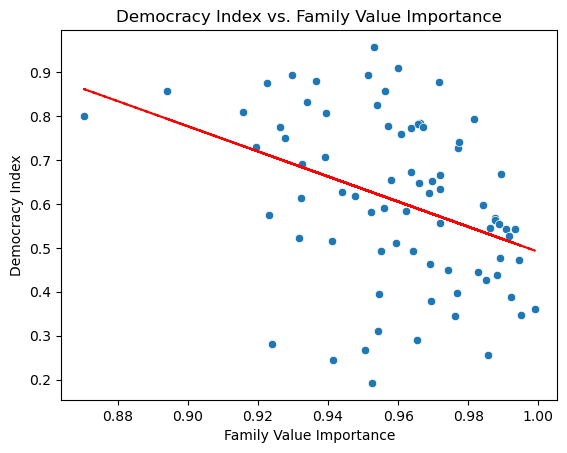

In [19]:
#Visualization of the relationship between family values and democracy

# create a figure and axis
fig, ax = plt.subplots()

# scatter plot of the data
sns.scatterplot(data=merged_df, x="Family Index", y="Total Democracy Index", ax=ax)

# calculate the trendline
x = merged_df["Family Index"]
y = merged_df["Total Democracy Index"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# plot trendline
plt.plot(x,p(x),"r--")

# add labels
ax.set_xlabel('Family Value Importance')
ax.set_ylabel('Democracy Index')
ax.set_title('Democracy Index vs. Family Value Importance')

# show the plot
plt.show()

In [20]:
#Check for lower outliers

# Sort the DataFrame by the 'Family Index' column in ascending order
merged_df_sorted_family = merged_df.sort_values('Family Index')

print(merged_df_sorted_family.head(2))

   Country name  Family Index  Friends Index  Leisure Index  Politics Index   
43    Lithuania      0.870333       0.693333       0.672667        0.341333  \
50  Netherlands      0.894000       0.819000       0.822000        0.469333   

    Religion Index  Work Index  Representative Government Score   
43           0.462       0.737                             0.81  \
50           0.312       0.638                             0.87   

    Fundamental Rights Score  Checks on Government Score   
43                      0.80                        0.87  \
50                      0.85                        0.86   

    Impartial Adminstration Score  Total Democracy Index          Region  
43                           0.72                 0.8000  Eastern Europe  
50                           0.85                 0.8575  Western Europe  


In [21]:
#Since it seems like Lithuania and the Netherlands could be outliers, as evidenced above in the scatterplot, I am going to run some
#statistical tests to see if this is really the case. If so, I will remove them from the dataset. 
lithuania_data = merged_df[merged_df['Country name'] == 'Lithuania']
print(lithuania_data[['Total Democracy Index', 'Family Index']])

#Z-score

merged_df['Z_score_democracy'] = zscore(merged_df['Total Democracy Index'])
merged_df['Z_score_family'] = zscore(merged_df['Family Index'])

lithuania_data = merged_df[merged_df['Country name'] == 'Lithuania']
print(lithuania_data[['Z_score_democracy', 'Z_score_family']])
#Since Lithuania is a 3 standard deviation outlier, I will remove it from the data set.

netherlands_data = merged_df[merged_df['Country name'] == 'Netherlands']
print(netherlands_data[['Total Democracy Index', 'Family Index']])

merged_df['Z_score_democracy'] = zscore(merged_df['Total Democracy Index'])
merged_df['Z_score_family'] = zscore(merged_df['Family Index'])

netherlands_data = merged_df[merged_df['Country name'] == 'Netherlands']
print(netherlands_data[['Z_score_democracy', 'Z_score_family']])
#Since the Netherlands is not a 3 standard deviation outlier, I will keep it in the data set.

    Total Democracy Index  Family Index
43                    0.8      0.870333
    Z_score_democracy  Z_score_family
43           1.037778       -3.611231
    Total Democracy Index  Family Index
50                 0.8575         0.894
    Z_score_democracy  Z_score_family
50           1.344107       -2.658171


In [22]:
# Remove the Lithuania data point and create a new copy of the data frame
index_lithuania = 43

merged_df_Q1 = merged_df.drop(index=index_lithuania).copy()
merged_df_sorted_family = merged_df_Q1.sort_values('Family Index')

print(merged_df_sorted_family.head(2))

   Country name  Family Index  Friends Index  Leisure Index  Politics Index   
50  Netherlands      0.894000       0.819000       0.822000        0.469333  \
12       Canada      0.915667       0.790667       0.819333        0.531333   

    Religion Index  Work Index  Representative Government Score   
50           0.312    0.638000                             0.87  \
12           0.383    0.648667                             0.84   

    Fundamental Rights Score  Checks on Government Score   
50                      0.85                        0.86  \
12                      0.81                        0.75   

    Impartial Adminstration Score  Total Democracy Index          Region   
50                           0.85                 0.8575  Western Europe  \
12                           0.84                 0.8100           Anglo   

    Z_score_democracy  Z_score_family  
50           1.344107       -2.658171  
12           1.091053       -1.785652  


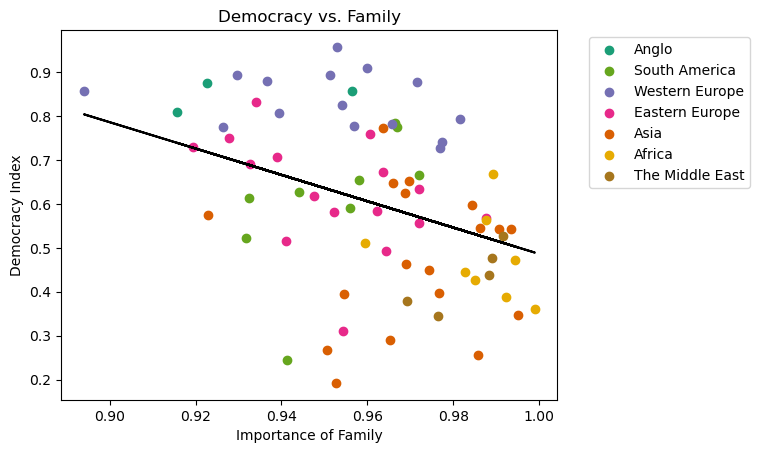

In [53]:
# Applies the new colored regions to the regression plot
for region, color in color_dict.items():
    bool_mask = merged_df_Q1['Region'] == region
    plt.scatter(
        merged_df_Q1.loc[bool_mask, 'Family Index'],
        merged_df_Q1.loc[bool_mask, 'Total Democracy Index'],
        color=color,
        label=region
    )

# Draw regression line
z = np.polyfit(merged_df_Q1['Family Index'], merged_df_Q1['Total Democracy Index'], 1)
p = np.poly1d(z)
plt.plot(merged_df_Q1['Family Index'], p(merged_df_Q1['Family Index']), color="black")

plt.xlabel('Importance of Family')
plt.ylabel('Democracy Index')
plt.title('Democracy vs. Family')

# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [24]:
# Fit the linear regression model
OLS_Family = smf.ols(formula='Q("Total Democracy Index") ~ Q("Family Index")', data=merged_df)
results = OLS_Family.fit()

# Perform RESET test
reset_test_results = reset_ramsey(results, degree=3)

# Print RESET test results
print("RESET test results:")
print(reset_test_results.summary())

# Calculate Pearson correlation coefficient
correlation, _ = stats.pearsonr(merged_df['Total Democracy Index'], merged_df['Family Index'])
print('Pearson correlation: %.3f' % correlation)

RESET test results:
<F test: F=0.46276347031255255, p=0.6313509081807256, df_denom=74, df_num=2>
Pearson correlation: -0.378


# Q2: Friends

In [25]:
# Fit the linear regression model
OLS_Friends = smf.ols(formula='Q("Total Democracy Index") ~ Q("Friends Index")', data=merged_df)
results = OLS_Friends.fit()

# Print out the statistics
print(results.summary())

correlation, _ = stats.pearsonr(merged_df['Total Democracy Index'], merged_df['Friends Index'])
print('Pearson correlation: %.3f' % correlation)

                                OLS Regression Results                                
Dep. Variable:     Q("Total Democracy Index")   R-squared:                       0.144
Model:                                    OLS   Adj. R-squared:                  0.133
Method:                         Least Squares   F-statistic:                     12.78
Date:                        Sat, 01 Jul 2023   Prob (F-statistic):           0.000614
Time:                                00:27:22   Log-Likelihood:                 25.866
No. Observations:                          78   AIC:                            -47.73
Df Residuals:                              76   BIC:                            -43.02
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

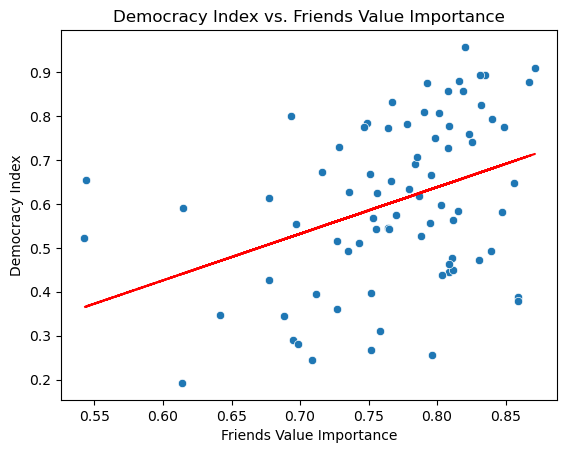

In [26]:
#Visualization of the relationship between friends values and democracy

# create a figure and axis
fig, ax = plt.subplots()

# scatter plot of the data
sns.scatterplot(data=merged_df, x="Friends Index", y="Total Democracy Index", ax=ax)

# calculate the trendline
x = merged_df["Friends Index"]
y = merged_df["Total Democracy Index"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# plot trendline
plt.plot(x,p(x),"r--")

# add labels
ax.set_xlabel('Friends Value Importance')
ax.set_ylabel('Democracy Index')
ax.set_title('Democracy Index vs. Friends Value Importance')

# show the plot
plt.show()

In [27]:
#Check for lower outliers

# Sort the DataFrame by the 'Friends Index' column in ascending order
merged_df_sorted_friends = merged_df.sort_values('Friends Index')

print(merged_df_sorted_friends.head(2))

   Country name  Family Index  Friends Index  Leisure Index  Politics Index   
7       Bolivia      0.931667       0.542333       0.733667        0.399667  \
56         Peru      0.958000       0.544000       0.694667        0.369000   

    Religion Index  Work Index  Representative Government Score   
7         0.799333    0.916333                             0.57  \
56        0.729333    0.881667                             0.78   

    Fundamental Rights Score  Checks on Government Score   
7                       0.52                        0.52  \
56                      0.58                        0.74   

    Impartial Adminstration Score  Total Democracy Index         Region   
7                            0.48                 0.5225  South America  \
56                           0.52                 0.6550  South America   

    Z_score_democracy  Z_score_family  
7           -0.440591       -1.141331  
56           0.265297       -0.080884  


In [28]:
#Since it seems like Bolivia and Peru could be outliers, as evidenced above in the scatterplot, I am going to run some
#statistical tests to see if this is really the case. If so, I will remove them from the dataset. 
bolivia_data = merged_df[merged_df['Country name'] == 'Bolivia']
print(bolivia_data[['Total Democracy Index', 'Friends Index']])

#Z-Score

merged_df['Z_score_democracy'] = zscore(merged_df['Total Democracy Index'])
merged_df['Z_score_friends'] = zscore(merged_df['Friends Index'])

bolivia_data = merged_df[merged_df['Country name'] == 'Bolivia']
print(bolivia_data[['Z_score_democracy', 'Z_score_friends']])
#Since Bolivia is a 3 standard deviation outlier, I will remove it from the data set.

peru_data = merged_df[merged_df['Country name'] == 'Peru']
print(peru_data[['Total Democracy Index', 'Friends Index']])

merged_df['Z_score_democracy'] = zscore(merged_df['Total Democracy Index'])
merged_df['Z_score_friends'] = zscore(merged_df['Friends Index'])

peru_data = merged_df[merged_df['Country name'] == 'Peru']
print(peru_data[['Z_score_democracy', 'Z_score_friends']])
#Since Peru is a 3 standard deviation outlier, I will remove it from the data set.

   Total Democracy Index  Friends Index
7                 0.5225       0.542333
   Z_score_democracy  Z_score_friends
7          -0.440591        -3.376302
    Total Democracy Index  Friends Index
56                  0.655          0.544
    Z_score_democracy  Z_score_friends
56           0.265297        -3.351466


In [29]:
# Remove the Bolivia and Peru data points and create a new copy of the data frame
index_bolivia = 7
index_peru = 56

merged_df_Q2 = merged_df.drop(index=[index_bolivia, index_peru]).copy()
merged_df_sorted_friends = merged_df_Q2.sort_values('Friends Index')

print(merged_df_sorted_friends.head(2))

   Country name  Family Index  Friends Index  Leisure Index  Politics Index   
10      Myanmar      0.952667       0.614000       0.637667        0.637333  \
20      Ecuador      0.956000       0.614333       0.771667        0.412333   

    Religion Index  Work Index  Representative Government Score   
10        0.929333    0.909667                             0.00  \
20        0.772000    0.920333                             0.73   

    Fundamental Rights Score  Checks on Government Score   
10                      0.28                        0.18  \
20                      0.58                        0.55   

    Impartial Adminstration Score  Total Democracy Index         Region   
10                           0.31                 0.1925           Asia  \
20                           0.50                 0.5900  South America   

    Z_score_democracy  Z_score_family  Z_score_friends  
10          -2.198651       -0.295658        -2.308392  
20          -0.080988       -0.161425  

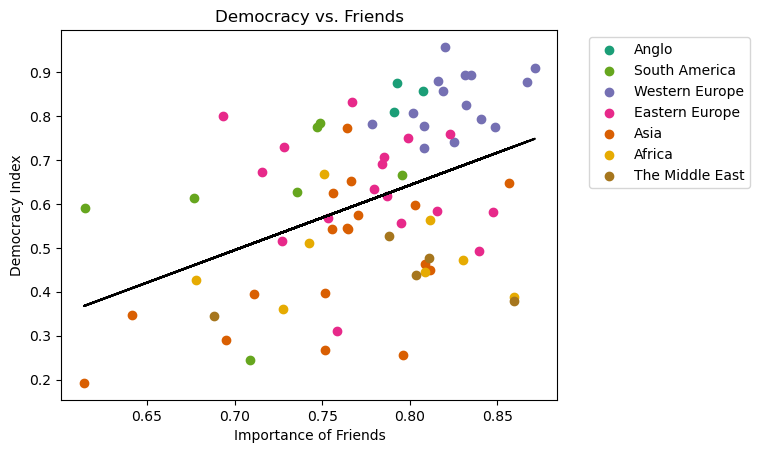

In [54]:
# Applies the new colored regions to the regression plot
for region, color in color_dict.items():
    bool_mask = merged_df_Q2['Region'] == region
    plt.scatter(
        merged_df_Q2.loc[bool_mask, 'Friends Index'],
        merged_df_Q2.loc[bool_mask, 'Total Democracy Index'],
        color=color,
        label=region
    )

# Draw regression line
z = np.polyfit(merged_df_Q2['Friends Index'], merged_df_Q2['Total Democracy Index'], 1)
p = np.poly1d(z)
plt.plot(merged_df_Q2['Friends Index'], p(merged_df_Q2['Friends Index']), color="black")

plt.xlabel('Importance of Friends')
plt.ylabel('Democracy Index')
plt.title('Democracy vs. Friends')

# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [31]:
# Fit the linear regression model
OLS_Friends = smf.ols(formula='Q("Total Democracy Index") ~ Q("Friends Index")', data=merged_df)
results = OLS_Friends.fit()

# Perform RESET test
reset_test_results = reset_ramsey(results, degree=3)

# Print RESET test results
print("RESET test results:")
print(reset_test_results.summary())

# Calculate Pearson correlation coefficient
correlation, _ = stats.pearsonr(merged_df['Total Democracy Index'], merged_df['Friends Index'])
print('Pearson correlation: %.3f' % correlation)

RESET test results:
<F test: F=2.844946321178018, p=0.0645139577410276, df_denom=74, df_num=2>
Pearson correlation: 0.379


In [32]:
# Fit the quadratic and cubic regression model
OLS_Friends_QuadCubic = smf.ols(formula='Q("Total Democracy Index") ~ Q("Friends Index") + np.power(Q("Friends Index"), 2) + np.power(Q("Friends Index"), 3)', data=merged_df)
results_quad_cubic = OLS_Friends_QuadCubic.fit()

# Print out the statistics for the quadratic and cubic regression
print(results_quad_cubic.summary())

correlation_quad_cubic, _ = stats.pearsonr(merged_df['Total Democracy Index'], np.power(merged_df['Friends Index'], 3))
print('Pearson correlation (quadratic and cubic): %.3f' % correlation_quad_cubic)

                                OLS Regression Results                                
Dep. Variable:     Q("Total Democracy Index")   R-squared:                       0.205
Model:                                    OLS   Adj. R-squared:                  0.173
Method:                         Least Squares   F-statistic:                     6.362
Date:                        Sat, 01 Jul 2023   Prob (F-statistic):           0.000677
Time:                                00:27:23   Log-Likelihood:                 28.756
No. Observations:                          78   AIC:                            -49.51
Df Residuals:                              74   BIC:                            -40.08
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

We wanted to check a polynomial model, but decided against using it.

# Q3: Leisure

In [33]:
# Fit the linear regression model
OLS_Leisure = smf.ols(formula='Q("Total Democracy Index") ~ Q("Leisure Index")', data=merged_df)
results = OLS_Leisure.fit()

# Print out the statistics
print(results.summary())

correlation, _ = stats.pearsonr(merged_df['Total Democracy Index'], merged_df['Leisure Index'])
print('Pearson correlation: %.3f' % correlation)

                                OLS Regression Results                                
Dep. Variable:     Q("Total Democracy Index")   R-squared:                       0.279
Model:                                    OLS   Adj. R-squared:                  0.269
Method:                         Least Squares   F-statistic:                     29.36
Date:                        Sat, 01 Jul 2023   Prob (F-statistic):           6.83e-07
Time:                                00:27:23   Log-Likelihood:                 32.545
No. Observations:                          78   AIC:                            -61.09
Df Residuals:                              76   BIC:                            -56.38
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

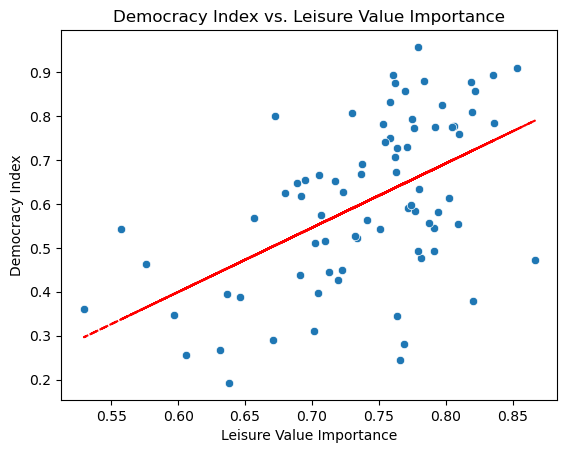

In [34]:
#Visualization of the relationship between leisure values and democracy

# create a figure and axis
fig, ax = plt.subplots()

# scatter plot of the data
sns.scatterplot(data=merged_df, x="Leisure Index", y="Total Democracy Index", ax=ax)

# calculate the trendline
x = merged_df["Leisure Index"]
y = merged_df["Total Democracy Index"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# plot trendline
plt.plot(x,p(x),"r--")

# add labels
ax.set_xlabel('Leisure Value Importance')
ax.set_ylabel('Democracy Index')
ax.set_title('Democracy Index vs. Leisure Value Importance')

# show the plot
plt.show()

In [35]:
#Check for lower outliers

# Sort the DataFrame by the 'Leisure Index' column in ascending order
merged_df_sorted_leisure = merged_df.sort_values('Leisure Index')

print(merged_df_sorted_leisure.head(2))

   Country name  Family Index  Friends Index  Leisure Index  Politics Index   
75        Egypt      0.999000       0.727333       0.529667           0.327  \
57  Philippines      0.993333       0.764667       0.557667           0.696   

    Religion Index  Work Index  Representative Government Score   
75           0.991    0.850667                             0.27  \
57           0.953    0.971333                             0.62   

    Fundamental Rights Score  Checks on Government Score   
75                      0.47                        0.40  \
57                      0.56                        0.57   

    Impartial Adminstration Score  Total Democracy Index  Region   
75                           0.30                 0.3600  Africa  \
57                           0.42                 0.5425    Asia   

    Z_score_democracy  Z_score_family  Z_score_friends  
75          -1.306302        1.570190        -0.619604  
57          -0.334042        1.341993        -0.063298  


In [36]:
#Since it seems like Egypt and Philippines could be outliers, as evidenced above in the scatterplot, I am going to run some
#statistical tests to see if this is really the case. If so, I will remove them from the dataset.
egypt_data = merged_df[merged_df['Country name'] == 'Egypt']
print(egypt_data[['Total Democracy Index', 'Leisure Index']])

#Z-Score

merged_df['Z_score_democracy'] = zscore(merged_df['Total Democracy Index'])
merged_df['Z_score_leisure'] = zscore(merged_df['Leisure Index'])

egypt_data = merged_df[merged_df['Country name'] == 'Egypt']
print(egypt_data[['Z_score_democracy', 'Z_score_leisure']])
#Since Egypt is a 3 standard deviation outlier, I will remove it from the data set.

philippines_data = merged_df[merged_df['Country name'] == 'Philippines']
print(philippines_data[['Total Democracy Index', 'Leisure Index']])

merged_df['Z_score_democracy'] = zscore(merged_df['Total Democracy Index'])
merged_df['Z_score_leisure'] = zscore(merged_df['Leisure Index'])

philippines_data = merged_df[merged_df['Country name'] == 'Philippines']
print(philippines_data[['Z_score_democracy', 'Z_score_leisure']])
#Since Philippines is not a 3 standard deviation outlier, I will keep it in the data set.

    Total Democracy Index  Leisure Index
75                   0.36       0.529667
    Z_score_democracy  Z_score_leisure
75          -1.306302        -3.115293
    Total Democracy Index  Leisure Index
57                 0.5425       0.557667
    Z_score_democracy  Z_score_leisure
57          -0.334042        -2.701353


In [37]:
# Remove the Egypt data point and create a new copy of the data frame
index_egypt = 75

merged_df_Q3 = merged_df.drop(index=index_egypt).copy()
merged_df_sorted_leisure = merged_df_Q3.sort_values('Leisure Index')

print(merged_df_sorted_leisure.head(2))

   Country name  Family Index  Friends Index  Leisure Index  Politics Index   
57  Philippines      0.993333       0.764667       0.557667           0.696  \
55     Pakistan      0.969000       0.808667       0.575667           0.428   

    Religion Index  Work Index  Representative Government Score   
57        0.953000    0.971333                             0.62  \
55        0.948667    0.793667                             0.52   

    Fundamental Rights Score  Checks on Government Score   
57                      0.56                        0.57  \
55                      0.43                        0.55   

    Impartial Adminstration Score  Total Democracy Index Region   
57                           0.42                 0.5425   Asia  \
55                           0.35                 0.4625   Asia   

    Z_score_democracy  Z_score_family  Z_score_friends  Z_score_leisure  
57          -0.334042        1.341993        -0.063298        -2.701353  
55          -0.760238        

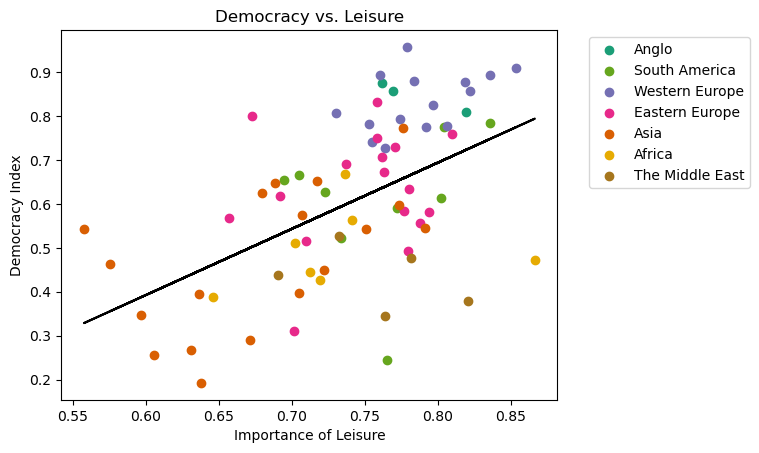

In [55]:
# Applies the new colored regions to the regression plot
for region, color in color_dict.items():
    bool_mask = merged_df_Q3['Region'] == region
    plt.scatter(
        merged_df_Q3.loc[bool_mask, 'Leisure Index'],
        merged_df_Q3.loc[bool_mask, 'Total Democracy Index'],
        color=color,
        label=region
    )

# Draw regression line
z = np.polyfit(merged_df_Q3['Leisure Index'], merged_df_Q3['Total Democracy Index'], 1)
p = np.poly1d(z)
plt.plot(merged_df_Q3['Leisure Index'], p(merged_df_Q3['Leisure Index']), color="black")

plt.xlabel('Importance of Leisure')
plt.ylabel('Democracy Index')
plt.title('Democracy vs. Leisure')

# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [39]:
# Fit the linear regression model
OLS_Leisure = smf.ols(formula='Q("Total Democracy Index") ~ Q("Leisure Index")', data=merged_df)
results = OLS_Leisure.fit()

# Perform RESET test
reset_test_results = reset_ramsey(results, degree=3)

# Print RESET test results
print("RESET test results:")
print(reset_test_results.summary())

# Calculate Pearson correlation coefficient
correlation, _ = stats.pearsonr(merged_df['Total Democracy Index'], merged_df['Leisure Index'])
print('Pearson correlation: %.3f' % correlation)

RESET test results:
<F test: F=1.260345254932899, p=0.28957099354235966, df_denom=74, df_num=2>
Pearson correlation: 0.528


# Q4: Politics

In [40]:
# Fit the linear regression model
OLS_Politics = smf.ols(formula='Q("Total Democracy Index") ~ Q("Politics Index")', data=merged_df)
results = OLS_Politics.fit()

# Print out the statistics
print(results.summary())

correlation, _ = stats.pearsonr(merged_df['Total Democracy Index'], merged_df['Politics Index'])
print('Pearson correlation: %.3f' % correlation)

                                OLS Regression Results                                
Dep. Variable:     Q("Total Democracy Index")   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                 -0.013
Method:                         Least Squares   F-statistic:                   0.03401
Date:                        Sat, 01 Jul 2023   Prob (F-statistic):              0.854
Time:                                00:27:24   Log-Likelihood:                 19.824
No. Observations:                          78   AIC:                            -35.65
Df Residuals:                              76   BIC:                            -30.94
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

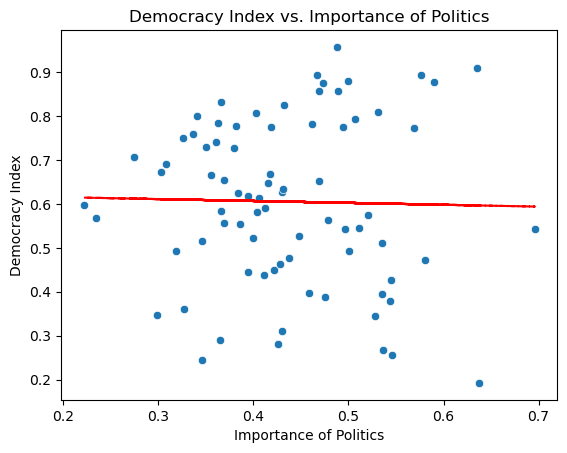

In [41]:
#Visualization of the relationship between political values and democracy

# create a figure and axis
fig, ax = plt.subplots()

# scatter plot of the data
sns.scatterplot(data=merged_df, x="Politics Index", y="Total Democracy Index", ax=ax)

# calculate the trendline
x = merged_df["Politics Index"]
y = merged_df["Total Democracy Index"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# plot trendline
plt.plot(x,p(x),"r--")

# add labels
ax.set_xlabel('Importance of Politics')
ax.set_ylabel('Democracy Index')
ax.set_title('Democracy Index vs. Importance of Politics')

# show the plot
plt.show()

No apparent outliers.

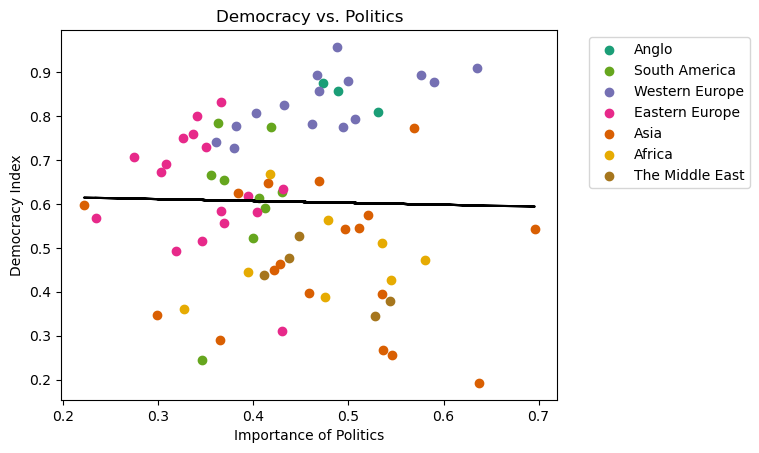

In [56]:
# Applies the new colored regions to the regression plot
for region, color in color_dict.items():
    bool_mask = merged_df['Region'] == region
    plt.scatter(
        merged_df.loc[bool_mask, 'Politics Index'],
        merged_df.loc[bool_mask, 'Total Democracy Index'],
        color=color,
        label=region
    )

# Draw regression line
z = np.polyfit(merged_df['Politics Index'], merged_df['Total Democracy Index'], 1)
p = np.poly1d(z)
plt.plot(merged_df['Politics Index'], p(merged_df['Politics Index']), color="black")

plt.xlabel('Importance of Politics')
plt.ylabel('Democracy Index')
plt.title('Democracy vs. Politics')

# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [43]:
# Fit the linear regression model
OLS_Politics = smf.ols(formula='Q("Total Democracy Index") ~ Q("Politics Index")', data=merged_df)
results = OLS_Politics.fit()

# Perform RESET test
reset_test_results = reset_ramsey(results, degree=3)

# Print RESET test results
print("RESET test results:")
print(reset_test_results.summary())

# Calculate Pearson correlation coefficient
correlation, _ = stats.pearsonr(merged_df['Total Democracy Index'], merged_df['Politics Index'])
print('Pearson correlation: %.3f' % correlation)

RESET test results:
<F test: F=0.1155771508358976, p=0.8910123317056275, df_denom=74, df_num=2>
Pearson correlation: -0.021


# Q5: Religion

In [44]:
# Fit the linear regression model
OLS_Religion = smf.ols(formula='Q("Total Democracy Index") ~ Q("Religion Index")', data=merged_df)
results = OLS_Religion.fit()

# Print out the statistics
print(results.summary())

correlation, _ = stats.pearsonr(merged_df['Total Democracy Index'], merged_df['Religion Index'])
print('Pearson correlation: %.3f' % correlation)

                                OLS Regression Results                                
Dep. Variable:     Q("Total Democracy Index")   R-squared:                       0.395
Model:                                    OLS   Adj. R-squared:                  0.387
Method:                         Least Squares   F-statistic:                     49.68
Date:                        Sat, 01 Jul 2023   Prob (F-statistic):           7.12e-10
Time:                                00:27:25   Log-Likelihood:                 39.424
No. Observations:                          78   AIC:                            -74.85
Df Residuals:                              76   BIC:                            -70.13
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

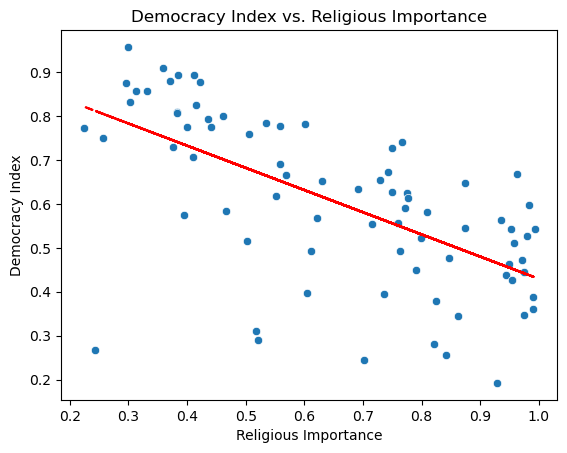

In [45]:
# Visualization of the relationship between religious values and democracy

# create a figure and axis
fig, ax = plt.subplots()

# scatter plot of the data
sns.scatterplot(data=merged_df, x="Religion Index", y="Total Democracy Index", ax=ax)

# calculate the trendline
x = merged_df["Religion Index"]
y = merged_df["Total Democracy Index"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# plot trendline
plt.plot(x,p(x),"r--")

# add labels
ax.set_xlabel('Religious Importance')
ax.set_ylabel('Democracy Index')
ax.set_title('Democracy Index vs. Religious Importance')

# show the plot
plt.show()

No apparent outliers.

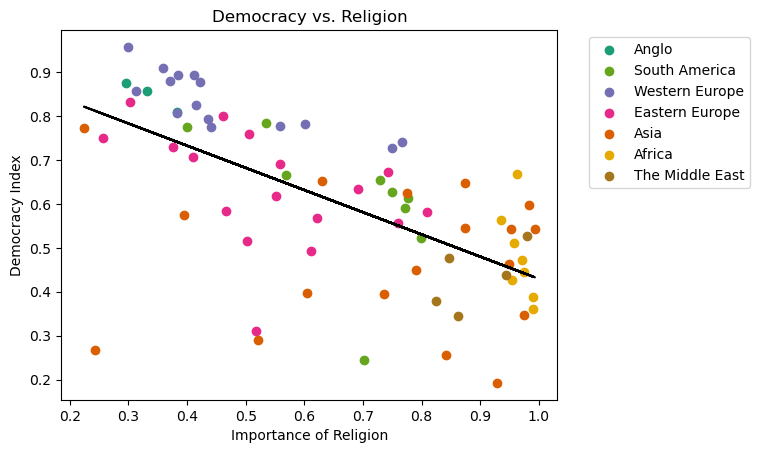

In [57]:
# Applies the new colored regions to the regression plot
for region, color in color_dict.items():
    bool_mask = merged_df['Region'] == region
    plt.scatter(
        merged_df.loc[bool_mask, 'Religion Index'],
        merged_df.loc[bool_mask, 'Total Democracy Index'],
        color=color,
        label=region
    )

# Draw regression line
z = np.polyfit(merged_df['Religion Index'], merged_df['Total Democracy Index'], 1)
p = np.poly1d(z)
plt.plot(merged_df['Religion Index'], p(merged_df['Religion Index']), color="black")

plt.xlabel('Importance of Religion')
plt.ylabel('Democracy Index')
plt.title('Democracy vs. Religion')

# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [47]:
# Fit the linear regression model
OLS_Religion = smf.ols(formula='Q("Total Democracy Index") ~ Q("Religion Index")', data=merged_df)
results = OLS_Religion.fit()

# Perform RESET test
reset_test_results = reset_ramsey(results, degree=3)

# Print RESET test results
print("RESET test results:")
print(reset_test_results.summary())

# Calculate Pearson correlation coefficient
correlation, _ = stats.pearsonr(merged_df['Total Democracy Index'], merged_df['Religion Index'])
print('Pearson correlation: %.3f' % correlation)

RESET test results:
<F test: F=1.6688784118565811, p=0.1954724220485778, df_denom=74, df_num=2>
Pearson correlation: -0.629


# Q6: Work

In [48]:
# Fit the linear regression model
OLS_Work = smf.ols(formula='Q("Total Democracy Index") ~ Q("Work Index")', data=merged_df)
results = OLS_Work.fit()

# Print out the statistics
print(results.summary())

correlation, _ = stats.pearsonr(merged_df['Total Democracy Index'], merged_df['Work Index'])
print('Pearson correlation: %.3f' % correlation)

                                OLS Regression Results                                
Dep. Variable:     Q("Total Democracy Index")   R-squared:                       0.189
Model:                                    OLS   Adj. R-squared:                  0.179
Method:                         Least Squares   F-statistic:                     17.75
Date:                        Sat, 01 Jul 2023   Prob (F-statistic):           6.87e-05
Time:                                00:27:26   Log-Likelihood:                 27.992
No. Observations:                          78   AIC:                            -51.98
Df Residuals:                              76   BIC:                            -47.27
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

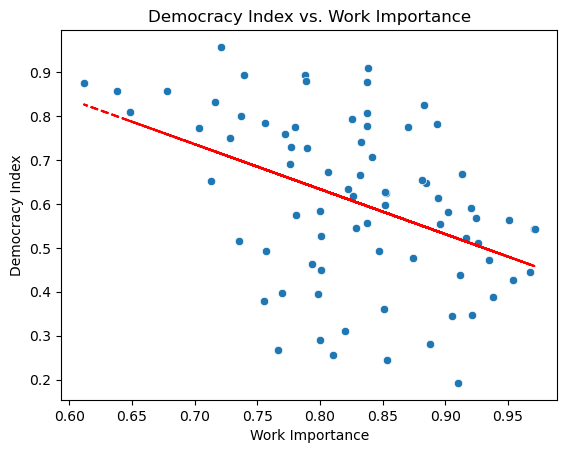

In [49]:
# Visualization of the relationship between work values and democracy

# create a figure and axis
fig, ax = plt.subplots()

# scatter plot of the data
sns.scatterplot(data=merged_df, x="Work Index", y="Total Democracy Index", ax=ax)

# calculate the trendline
x = merged_df["Work Index"]
y = merged_df["Total Democracy Index"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# plot trendline
plt.plot(x, p(x), "r--")

# add labels
ax.set_xlabel('Work Importance')
ax.set_ylabel('Democracy Index')
ax.set_title('Democracy Index vs. Work Importance')

# show the plot
plt.show()

No apparent outliers.

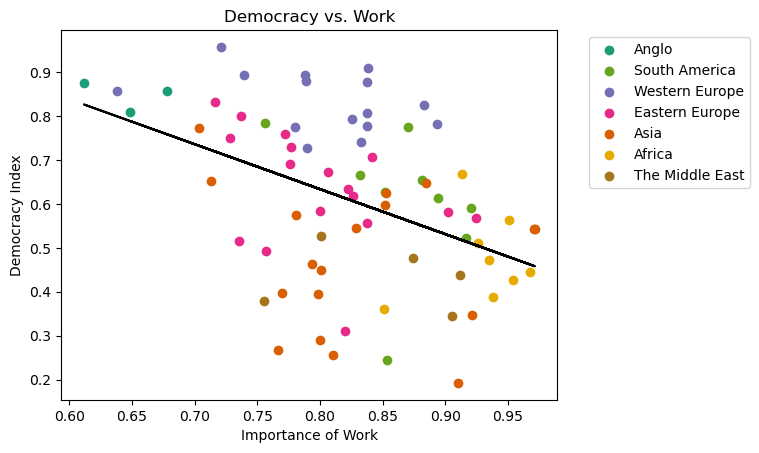

In [58]:
# Applies the new colored regions to the regression plot
for region, color in color_dict.items():
    bool_mask = merged_df['Region'] == region
    plt.scatter(
        merged_df.loc[bool_mask, 'Work Index'],
        merged_df.loc[bool_mask, 'Total Democracy Index'],
        color=color,
        label=region
    )

# Draw regression line
z = np.polyfit(merged_df['Work Index'], merged_df['Total Democracy Index'], 1)
p = np.poly1d(z)
plt.plot(merged_df['Work Index'], p(merged_df['Work Index']), color="black")

plt.xlabel('Importance of Work')
plt.ylabel('Democracy Index')
plt.title('Democracy vs. Work')

# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [51]:
# Fit the linear regression model
OLS_Work = smf.ols(formula='Q("Total Democracy Index") ~ Q("Work Index")', data=merged_df)
results = OLS_Work.fit()

# Perform RESET test
reset_test_results = reset_ramsey(results, degree=3)

# Print RESET test results
print("RESET test results:")
print(reset_test_results.summary())

# Calculate Pearson correlation coefficient
correlation, _ = stats.pearsonr(merged_df['Total Democracy Index'], merged_df['Work Index'])
print('Pearson correlation: %.3f' % correlation)

RESET test results:
<F test: F=0.42491528122598926, p=0.6554102544959401, df_denom=74, df_num=2>
Pearson correlation: -0.435


# Multiple Regression

In [52]:
# Assuming merged_df is a pandas DataFrame containing the required variables

# Define the dependent variable and explanatory variables
dependent_var = 'Total Democracy Index'
explanatory_vars = ['Family Index', 'Friends Index', 'Leisure Index', 'Politics Index', 'Religion Index', 'Work Index']

# Create the design matrix
X = sm.add_constant(merged_df[explanatory_vars])
y = merged_df[dependent_var]

# Fit the multiple regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Total Democracy Index   R-squared:                       0.533
Model:                               OLS   Adj. R-squared:                  0.493
Method:                    Least Squares   F-statistic:                     13.49
Date:                   Sat, 01 Jul 2023   Prob (F-statistic):           3.79e-10
Time:                           00:27:27   Log-Likelihood:                 49.482
No. Observations:                     78   AIC:                            -84.96
Df Residuals:                         71   BIC:                            -68.47
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         